<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/DataIntoBatches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

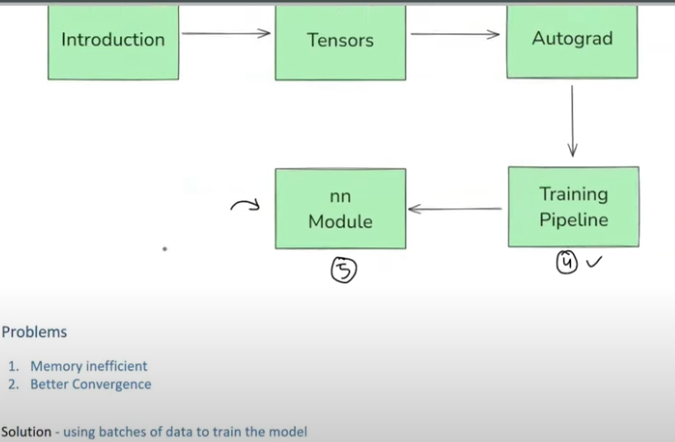

We used batch gradient decent till now, used full data to train (full data on ram)

not efficient
mainly for big data like image classification

we cannot reach to good convergance (parameters updates will be very slow)

SCD - faster parameter updates after every row

Now mini batch gradient decent

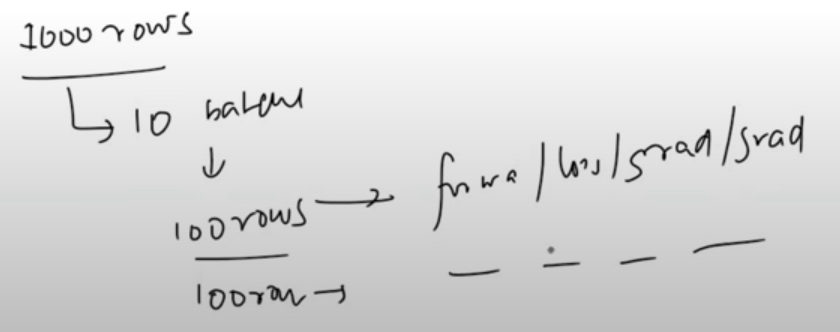

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [4]:
class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out

In [5]:
loss_function = nn.BCELoss()

Assume we have total data 32 and divide to 10 batches of size 32

In [6]:
batch_size = 32
epochs = 25
n_samples = len(X_train_tensor)

In [10]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

learning_rate = 0.1

# optimization
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
for epoch in range(epochs):
  for start_idx in range(0, n_samples, batch_size):
    end_idx = start_idx + batch_size
    X_batch = X_train_tensor[start_idx:end_idx]
    y_batch = y_train_tensor[start_idx:end_idx]

    y_pred = model(X_batch.float())
    loss = loss_function(y_pred, y_batch.view(-1,1).float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch} Loss: {loss.item()}')

Epoch: 0 Loss: 0.15684618055820465
Epoch: 1 Loss: 0.10046348720788956
Epoch: 2 Loss: 0.07716808468103409
Epoch: 3 Loss: 0.06394994258880615
Epoch: 4 Loss: 0.05527063086628914
Epoch: 5 Loss: 0.04905347153544426
Epoch: 6 Loss: 0.04433564469218254
Epoch: 7 Loss: 0.04060659930109978
Epoch: 8 Loss: 0.03756866231560707
Epoch: 9 Loss: 0.0350356325507164
Epoch: 10 Loss: 0.03288448974490166
Epoch: 11 Loss: 0.031030382961034775
Epoch: 12 Loss: 0.029412662610411644
Epoch: 13 Loss: 0.027986671775579453
Epoch: 14 Loss: 0.026718689128756523
Epoch: 15 Loss: 0.025582825765013695
Epoch: 16 Loss: 0.024558620527386665
Epoch: 17 Loss: 0.023629844188690186
Epoch: 18 Loss: 0.022783396765589714
Epoch: 19 Loss: 0.02200847491621971
Epoch: 20 Loss: 0.021296139806509018
Epoch: 21 Loss: 0.020639019086956978
Epoch: 22 Loss: 0.020030764862895012
Epoch: 23 Loss: 0.019466077908873558
Epoch: 24 Loss: 0.0189403984695673


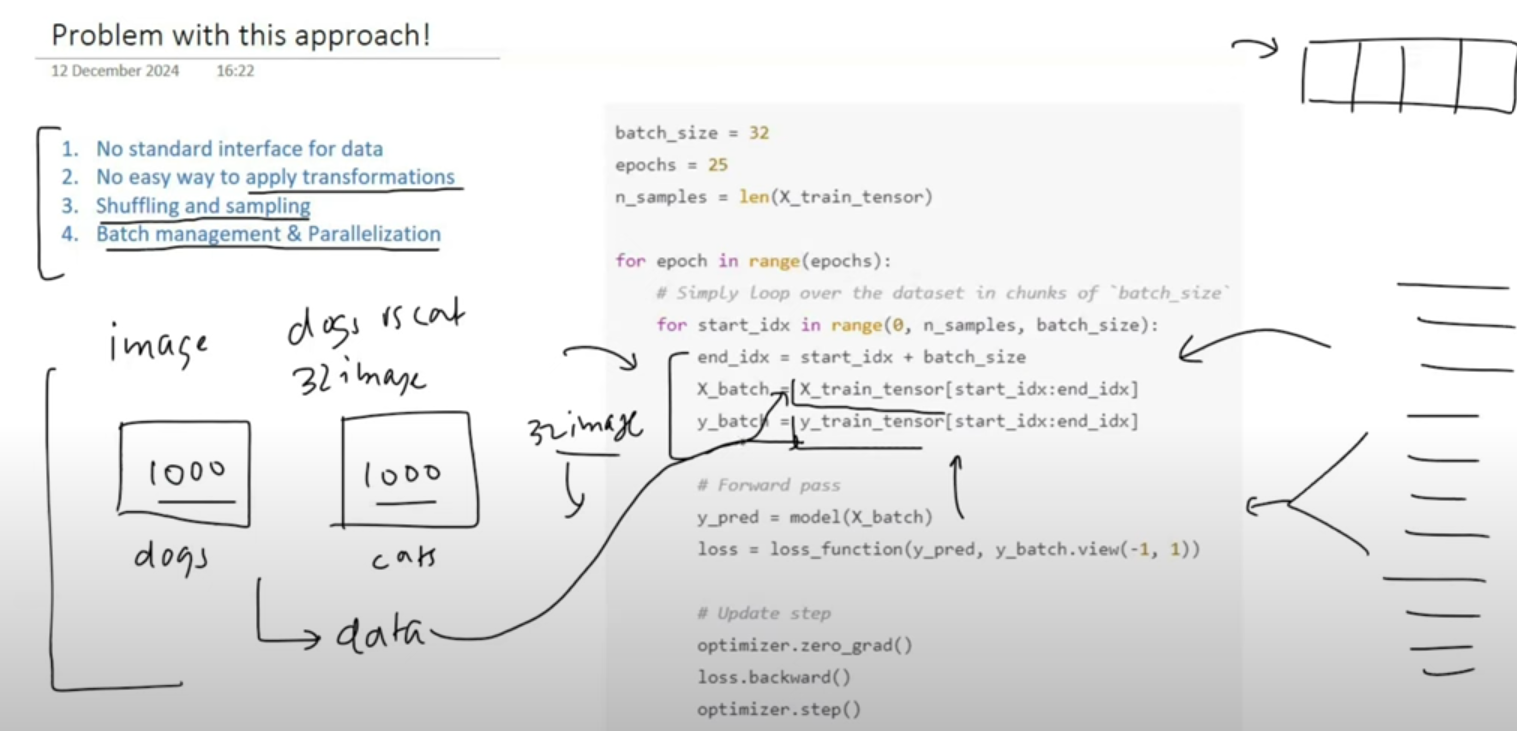

To solve these problems, Pytorch gives us Datasets and Dataloaders